<h4> Objectives:</h4>
<ul>
<li> Data exploration to learn more about the data
<li> Perform some basic clean up
</ul>

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

In [2]:
titles = pd.read_json("dataset"+os.sep+"movie_titles_metadata.json")

In [3]:
titles.head(3)

,genres,imdb_rating,imdb_votes,movie_id,movie_title,movie_year
0,"['comedy', 'romance']\n",6.9,62847,m0,10 things i hate about you,1999
1,"['adventure', 'biography', 'drama', 'history']\n",6.2,10421,m1,1492: conquest of paradise,1992
10,"['drama', 'mystery', 'thriller']\n",6.9,7252,m10,affliction,1997


In [4]:
titles.shape

(617, 6)

In [5]:
titles["genres"] = titles["genres"].apply(lambda x:x.replace("\n",""))

In [6]:
titles.head(3)

,genres,imdb_rating,imdb_votes,movie_id,movie_title,movie_year
0,"['comedy', 'romance']",6.9,62847,m0,10 things i hate about you,1999
1,"['adventure', 'biography', 'drama', 'history']",6.2,10421,m1,1492: conquest of paradise,1992
10,"['drama', 'mystery', 'thriller']",6.9,7252,m10,affliction,1997


In [7]:
characters = pd.read_json("dataset"+os.sep+"movie_characters_metadata.json")

In [8]:
characters.head(3)

,character_id,character_name,gender,movie_id,movie_title,position_credits
0,u0,BIANCA,f,m0,10 things i hate about you,4\n
1,u1,BRUCE,?,m0,10 things i hate about you,?\n
10,u10,SHARON,?,m0,10 things i hate about you,?\n


In [9]:
characters["position_credits"] = characters["position_credits"].apply(lambda x:x.replace("\n",""))

In [10]:
characters.head(3)

,character_id,character_name,gender,movie_id,movie_title,position_credits
0,u0,BIANCA,f,m0,10 things i hate about you,4
1,u1,BRUCE,?,m0,10 things i hate about you,?
10,u10,SHARON,?,m0,10 things i hate about you,?


In [11]:
lines = pd.read_json("dataset"+os.sep+"movie_lines.json")

In [12]:
lines.head(3)

,character_id,character_name,line_id,movie_id,text
0,u0,BIANCA,L1045,m0,They do not!\n
1,u2,CAMERON,L1044,m0,They do to!\n
10,u2,CAMERON,L868,m0,"The ""real you"".\n"


In [13]:
lines["text"] = lines["text"].apply(lambda x:x.replace("\n",""))

In [14]:
lines.head(3)

,character_id,character_name,line_id,movie_id,text
0,u0,BIANCA,L1045,m0,They do not!
1,u2,CAMERON,L1044,m0,They do to!
10,u2,CAMERON,L868,m0,"The ""real you""."


In [101]:
lines.sort_values(by=["movie_id","line_id"]).head(3)

,character_id,character_name,line_id,movie_id,text
561,u11,WALTER,L1000,m0,"Oh, Christ. Don't tell me you've changed your..."
109,u0,BIANCA,L1007,m0,Let go!
108,u5,KAT,L1008,m0,You set me up.


In [15]:
conversations = pd.read_json("dataset"+os.sep+"movie_conversations.json")

In [16]:
conversations.head(3)

,character_id_1,character_id_2,line_ids,movie_id
0,u0,u2,"['L194', 'L195', 'L196', 'L197']\n",m0
1,u0,u2,"['L198', 'L199']\n",m0
10,u0,u2,"['L367', 'L368']\n",m0


In [17]:
conversations["line_ids"]=conversations["line_ids"].apply(lambda x:x.replace("\n",""))

In [18]:
conversations.head(3)

,character_id_1,character_id_2,line_ids,movie_id
0,u0,u2,"['L194', 'L195', 'L196', 'L197']",m0
1,u0,u2,"['L198', 'L199']",m0
10,u0,u2,"['L367', 'L368']",m0


In [19]:
no_movies_year = titles[["movie_year","movie_id"]].groupby("movie_year").count().reset_index()

In [20]:
no_movies_year.head(3)

,movie_year,movie_id
0,1927,2
1,1931,2
2,1932,4


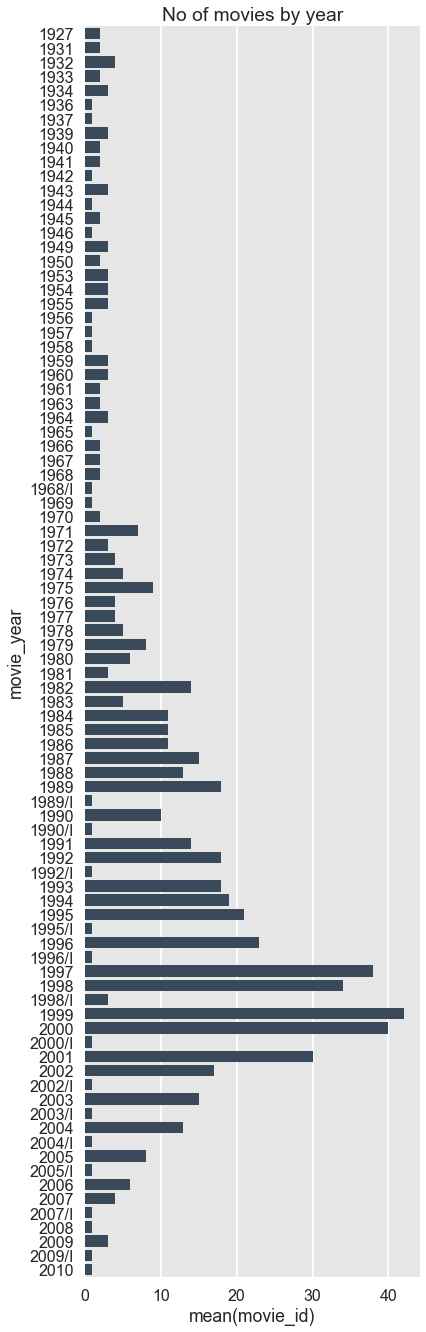

In [83]:
plt.figure(figsize=(6, 23))
sns.set_context("poster")
ax = sns.barplot(y="movie_year",x="movie_id",data=no_movies_year, color="#34495e")
ax.set_title("No of movies by year")

In [33]:
titles["movie_year"]=titles["movie_year"].apply(lambda x:x.replace("/I","")).astype(int)

In [106]:
genres_year = []
for idx,row in titles.iterrows():
    genres = ast.literal_eval(row["genres"])
    for x in genres:
        genres_year.append({"genre":x,"title":row["movie_title"],"year":row["movie_year"],"movie_id":row["movie_id"]})

In [107]:
genres_year = pd.DataFrame(genres_year)

In [108]:
genres_year.head(3)

,genre,movie_id,title,year
0,comedy,m0,10 things i hate about you,1999
1,romance,m0,10 things i hate about you,1999
2,adventure,m1,1492: conquest of paradise,1992


In [37]:
no_genres_year = genres_year.groupby(["year","genre"]).count().reset_index()

In [43]:
no_genres_year.tail(3)

,year,genre,title
604,2010,horror,1
605,2010,short,1
606,2010,thriller,1


In [56]:
genres_year.genre.unique()

array(['comedy', 'romance', 'adventure', 'biography', 'drama', 'history',
       'mystery', 'thriller', 'action', 'crime', 'sci-fi', 'horror',
       'fantasy', 'animation', 'war', 'family', 'short', 'film-noir',
       'western', 'music', 'sport', 'musical', 'documentary', 'adult'], dtype=object)

C:\Users\cbgk\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


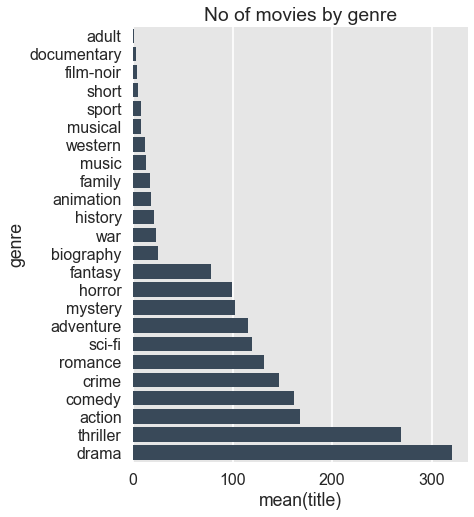

In [81]:
genres_count = genres_year[["genre","title"]].groupby("genre").count().reset_index().sort("title")
plt.figure(figsize=(6, 8))
sns.set_context("poster")
ax = sns.barplot(y="genre",x="title",data=genres_count, color="#34495e")
ax.set_title("No of movies by genre")

<li> Trying to get a sense of how many lines a movie generally has
<li> What is generally the length of a dialogue? Does it have a time trend?
<li> 

In [84]:
movie_line_count = lines[["movie_id","line_id"]].groupby("movie_id").count().reset_index()

In [85]:
movie_line_count.head(3)

,movie_id,line_id
0,m0,669
1,m1,273
2,m10,627


In [86]:
movie_line_count.describe()

,line_id
count,617.000000
mean,493.862237
std,228.206379
min,6.000000
25%,330.000000
50%,474.000000
75%,625.000000
max,1530.000000


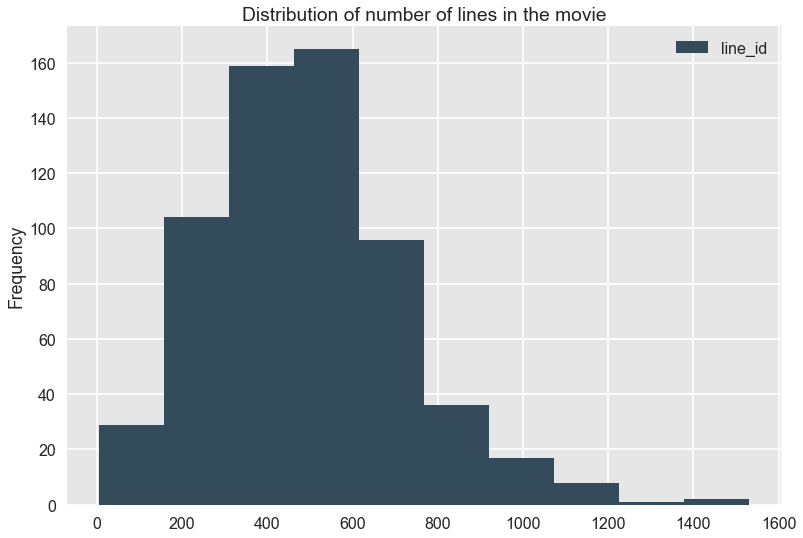

In [88]:
movie_line_count.plot(kind="hist",title="Distribution of number of lines in the movie")

In [92]:
movie_line_count = lines[["movie_id","line_id"]].groupby(["movie_id"]).count().reset_index()
time_line = pd.merge(movie_line_count,titles[["movie_id","movie_year"]],on="movie_id",how="inner")

plt.figure(figsize=(6, 8))
sns.set_context("poster")
time_line_trend.plot(x="movie_year",y="line_id",kind="line",title="Median number of lines by year")

<li> There is general trend between decades that number of lines in movies are decreasing! Needs further exploration to ascertain this.

<b> Rewriting the changes back to the dataset

In [104]:
titles.to_json("dataset"+os.sep+"movie_titles_metadata.json")
lines.to_json("dataset"+os.sep+"movie_lines.json")
characters.to_json("dataset"+os.sep+"movie_characters_metadata.json")
conversations.to_json("dataset"+os.sep+"movie_conversations.json")

In [109]:
genres_year.to_json("dataset"+os.sep+"movie_genres_year.json")